In [29]:
library(psych)
library(ggplot2)
library(car)
library(fmsb)
library(dplyr)

In [18]:
library(Hmisc)	#Only load this after using psych; it overrides psych

In [3]:
# Read data
path = "C:/Users/Administrator/Documents/Master/MSIS-5223-70250 - Programming for Data Sci - 8282017 - 159 PM/Homework"
data = paste( path,'\\CaliforniaHospitalData.csv', sep ='')
df = read.csv(data,header =T,sep =',')

In [14]:
library(Hmisc) #Only load this after using psych; it overrides psych

Warning message:
"package 'Hmisc' was built under R version 3.4.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    combine, src, summarize

The following object is masked from 'package:psych':

    describe

The following objects are masked from 'package:base':

    format.pval, round.POSIXt, trunc.POSIXt, units



In [4]:
str(df)

'data.frame':	61 obs. of  14 variables:
 $ HospitalID : int  45740 12145 25667 46996 37393 17741 20277 45736 29823 13738 ...
 $ Name       : Factor w/ 61 levels "Alameda Hospital",..: 26 61 36 38 3 47 60 32 11 49 ...
 $ Zip        : Factor w/ 61 levels "90033","90048",..: 28 16 9 29 12 56 44 14 51 11 ...
 $ Website    : Factor w/ 60 levels "coloradorivermedical.org",..: 28 60 39 41 6 2 59 31 11 50 ...
 $ TypeControl: Factor w/ 4 levels "City/County",..: 2 4 2 4 3 4 4 2 4 4 ...
 $ Teaching   : Factor w/ 2 levels "Small/Rural",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ DonorType  : Factor w/ 2 levels "Alumni","Charity": 2 2 2 2 2 2 2 2 2 2 ...
 $ NoFTE      : num  327 345 601 400 262 ...
 $ NetPatRev  : num  135520 136157 197094 139170 116798 ...
 $ InOperExp  : num  20523426 33447543 37254179 23385570 13684502 ...
 $ OutOperExp : num  34916220 20348596 37832448 24661356 15159987 ...
 $ OperRev    : int  49933713 53351748 72933707 51087341 42845642 85808509 79005075 11947133 19445901 199873795 ...
 

In [ ]:
# for multiple regression model I am using only numerical variable

In [ ]:
Filter(is.numeric, df)

In [86]:
#Covert to numeric data for number
df_lg <- sapply(df, as.numeric)
df_lg

HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
45740,26,28,28,2,1,2,327.00,135520.22,20523426,34916220,49933713,-5505933,15
12145,61,16,60,4,1,2,345.00,136156.69,33447543,20348596,53351748,-444391,99
25667,36,9,39,2,1,2,601.20,197094.25,37254179,37832448,72933707,-2152920,107
46996,38,29,41,4,1,2,400.00,139170.38,23385570,24661356,51087341,3040415,55
37393,3,12,6,3,1,2,262.00,116797.83,13684502,15159987,42845642,14001153,42
17741,47,56,2,4,1,2,397.50,232503.02,36682889,36739260,85808509,12386360,66
20277,60,44,59,4,1,2,503.50,214516.45,32709223,43571851,79005075,2724001,65
45736,32,14,31,2,1,2,158.00,30786.20,5733927,10727445,11947133,-4514239,35
29823,11,51,11,4,1,2,168.00,51726.49,9022366,10402510,19445901,21025,48
13738,49,11,50,4,1,2,1216.00,540975.12,125128283,66801545,199873795,7943967,186


In [5]:
#Chose numeric data
dfnew <- df[-c(1,2,3,4,5,6,7)]

In [6]:
attach(dfnew)

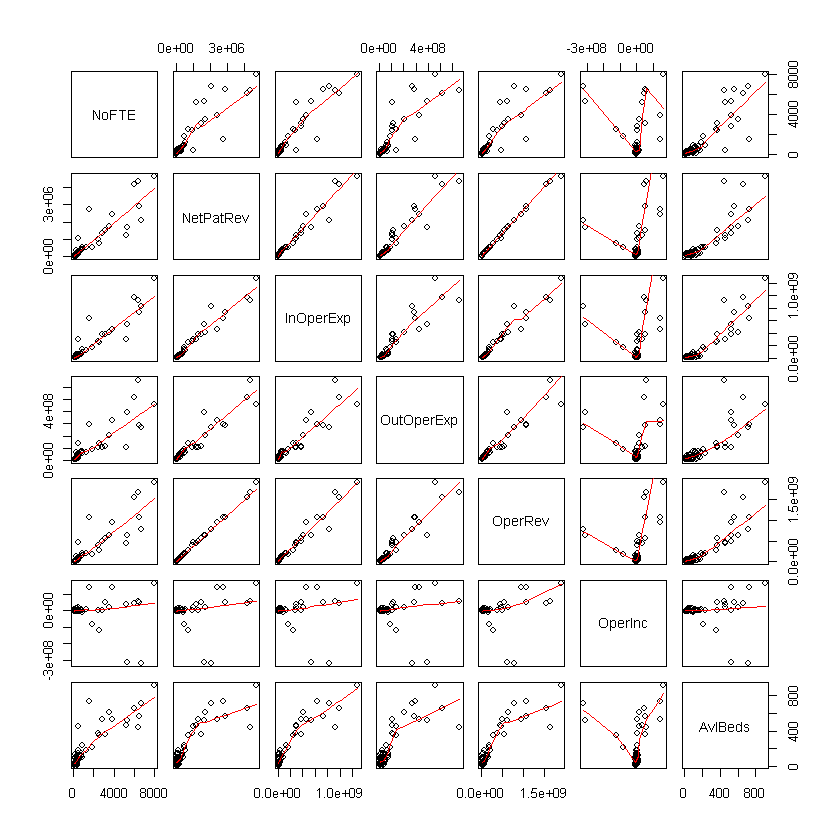

In [7]:
pairs(dfnew, panel=panel.smooth) 

In [ ]:
#See how quickly a scatter plot helps see the relationships between the variables. 
#Operating Revenue increase with increase in number of NoFTE, NetPatRev, InOperExp, OutOper 
#increases with acceleration (the variable acceleration represents time taken to acceleration from range $1906944100

In [8]:
ozone_corr = cor(dfnew)
ozone_corr

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
NoFTE,1.00000000,0.9038272,0.93805150,0.88029546,0.8963870,-0.07231425,0.88133305
NetPatRev,0.90382720,1.0000000,0.97910894,0.96023198,0.9987650,0.22014898,0.88772726
InOperExp,0.93805150,0.9791089,1.00000000,0.93586293,0.9798165,0.07178052,0.92552054
OutOperExp,0.88029546,0.9602320,0.93586293,1.00000000,0.9552386,0.05621751,0.82689246
OperRev,0.89638699,0.9987650,0.97981651,0.95523858,1.0000000,0.23427007,0.89001754
OperInc,-0.07231425,0.2201490,0.07178052,0.05621751,0.2342701,1.00000000,0.04185734
AvlBeds,0.88133305,0.8877273,0.92552054,0.82689246,0.8900175,0.04185734,1.00000000


In [9]:
describe(OperRev)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,61,256273311,424985115,63398216,150743632,75765201,5235317,1912179417,1906944100,2.288816,4.748172,54413768


In [101]:
dfnew.fit <- lm(OperRev~.,data = dfnew)
summary(dfnew.fit)


Call:
lm(formula = OperRev ~ ., data = dfnew)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.041060 -0.005439 -0.000379  0.001926  0.045131 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -4.249e-03  2.776e-03 -1.530e+00  0.13177    
NoFTE       -1.021e-05  3.032e-06 -3.367e+00  0.00141 ** 
NetPatRev    3.429e-07  3.925e-08  8.735e+00 6.54e-12 ***
InOperExp    1.000e+00  9.319e-11  1.073e+10  < 2e-16 ***
OutOperExp   1.000e+00  1.206e-10  8.290e+09  < 2e-16 ***
OperInc      1.000e+00  1.018e-10  9.822e+09  < 2e-16 ***
AvlBeds      9.789e-05  2.199e-05  4.451e+00 4.32e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01356 on 54 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 9.82e+21 on 6 and 54 DF,  p-value: < 2.2e-16


In [100]:
dfnew2 = step(dfnew)
summary(dfnew2)

ERROR: Error in terms.default(object): no terms component nor attribute


In [ ]:
#P-values for coefficients of cylinders, horsepower and acceleratio NoFTE, NetPatRev, InOperExp, OutOper  are all less than 0.05. 
#This means that the relationship between the dependent and these independent variables is significant at the 95% certainty level
#I will inclide all variable in dfnew dataset.
# Model is not really good.

In [22]:
#### What about significance of the correlations? 
#### This shows the correlation values (rounded) and their associated p-values
rcorr(as.matrix(dfnew))

           NoFTE NetPatRev InOperExp OutOperExp OperRev OperInc AvlBeds
NoFTE       1.00      0.90      0.94       0.88    0.90   -0.07    0.88
NetPatRev   0.90      1.00      0.98       0.96    1.00    0.22    0.89
InOperExp   0.94      0.98      1.00       0.94    0.98    0.07    0.93
OutOperExp  0.88      0.96      0.94       1.00    0.96    0.06    0.83
OperRev     0.90      1.00      0.98       0.96    1.00    0.23    0.89
OperInc    -0.07      0.22      0.07       0.06    0.23    1.00    0.04
AvlBeds     0.88      0.89      0.93       0.83    0.89    0.04    1.00

n= 61 


P
           NoFTE  NetPatRev InOperExp OutOperExp OperRev OperInc AvlBeds
NoFTE             0.0000    0.0000    0.0000     0.0000  0.5797  0.0000 
NetPatRev  0.0000           0.0000    0.0000     0.0000  0.0882  0.0000 
InOperExp  0.0000 0.0000              0.0000     0.0000  0.5825  0.0000 
OutOperExp 0.0000 0.0000    0.0000               0.0000  0.6670  0.0000 
OperRev    0.0000 0.0000    0.0000    0.0000   

In [95]:
dfnew.fit <- lm(OperRev~ InOperExp+ OutOperExp +OperInc ,data = dfnew)
summary(dfnew.fit)


Call:
lm(formula = OperRev ~ InOperExp + OutOperExp + OperInc, data = dfnew)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.107604 -0.005145 -0.003345  0.000336  0.052252 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 2.263e-03  3.348e-03 6.760e-01    0.502    
InOperExp   1.000e+00  2.822e-11 3.544e+10   <2e-16 ***
OutOperExp  1.000e+00  5.807e-11 1.722e+10   <2e-16 ***
OperInc     1.000e+00  3.936e-11 2.540e+10   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02175 on 57 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 7.637e+21 on 3 and 57 DF,  p-value: < 2.2e-16


In [45]:
#Test Independence Assumption
durbinWatsonTest(dfnew)

ERROR: Error in durbinWatsonTest.default(dfnew): requires vector of residuals


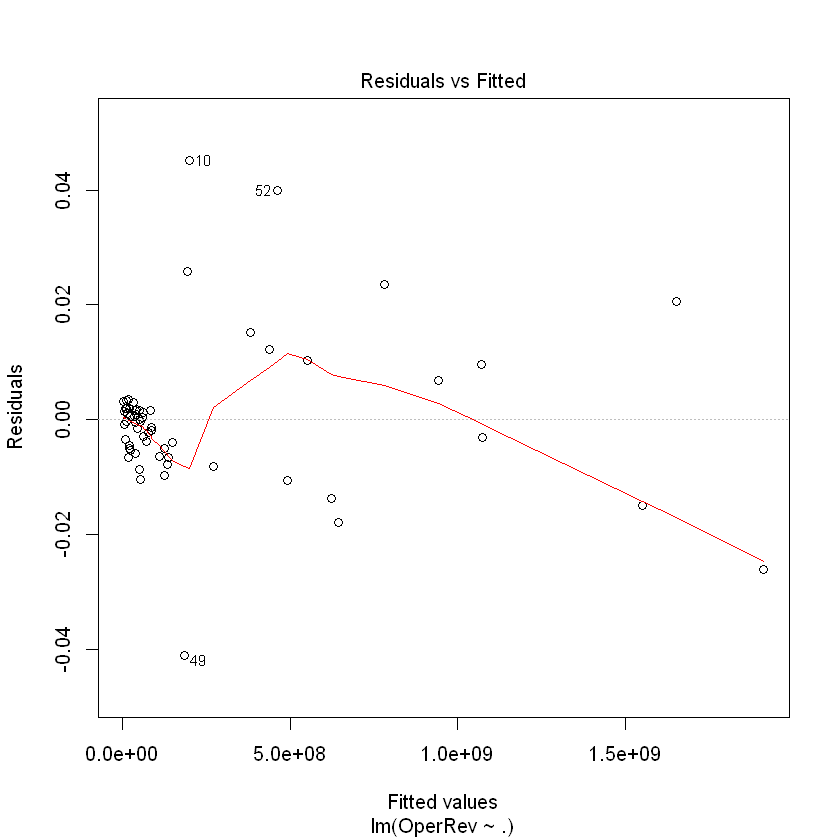

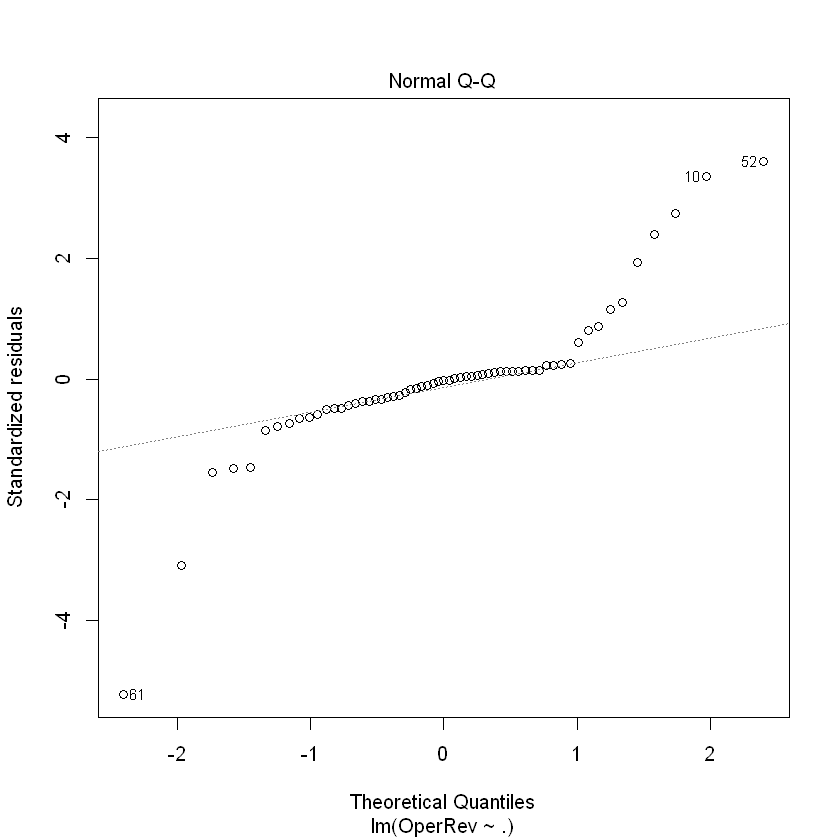

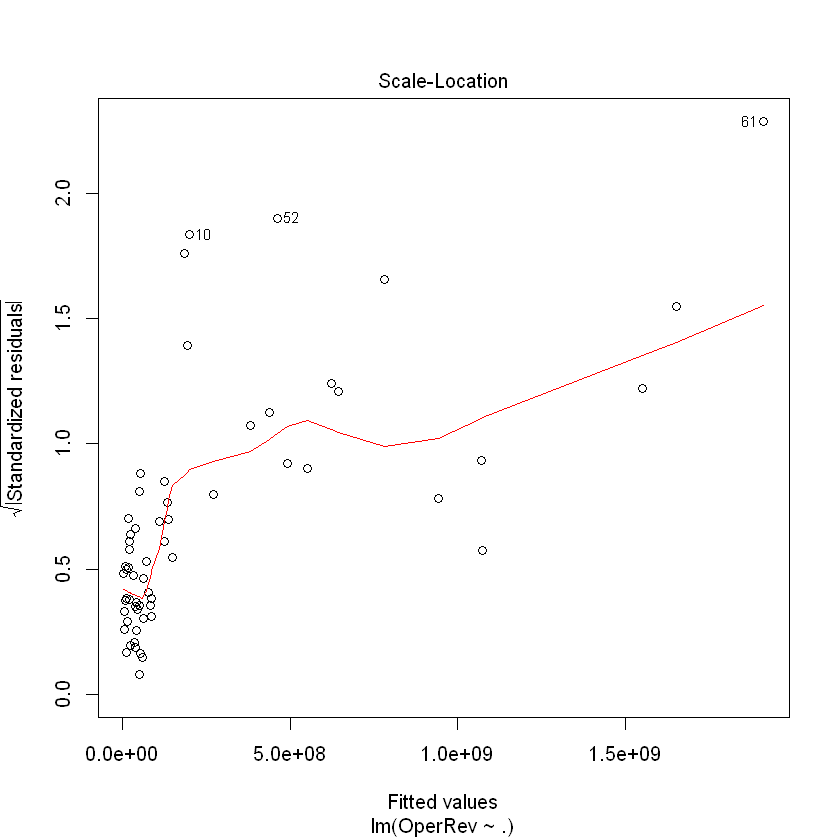

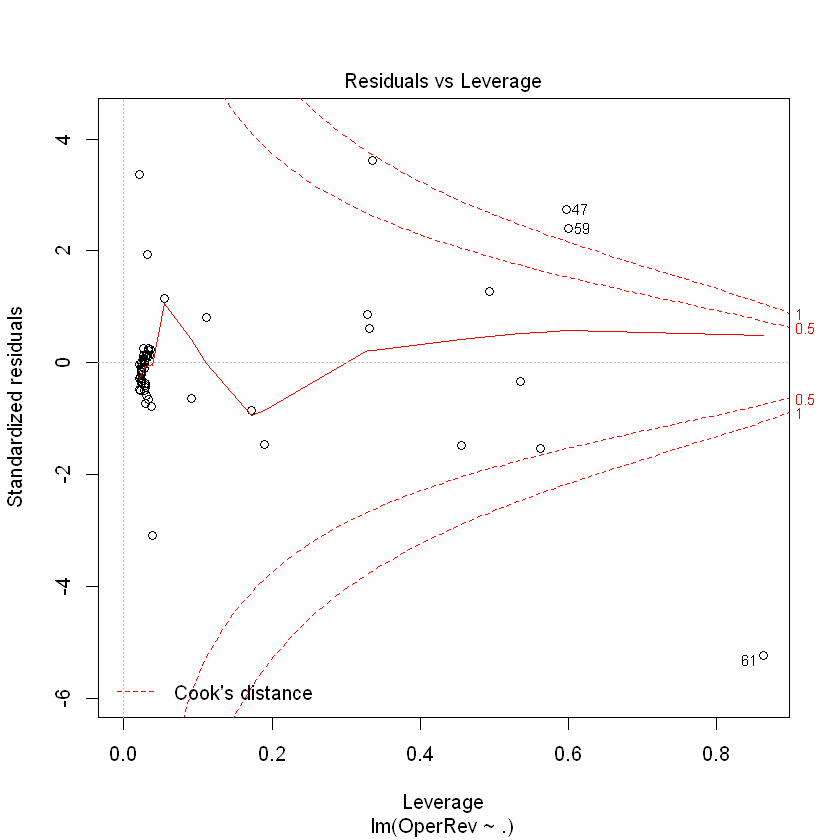

In [102]:
plot(dfnew.fit)

In [97]:
dfnew1.fit = lm(log(OperRev)~.,data = dfnew)

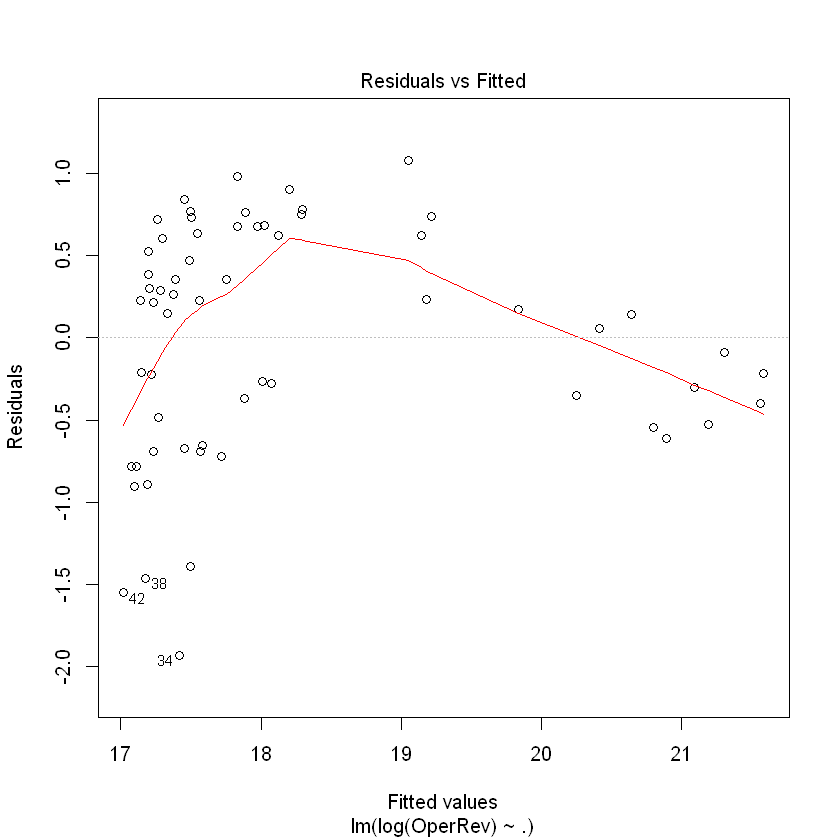

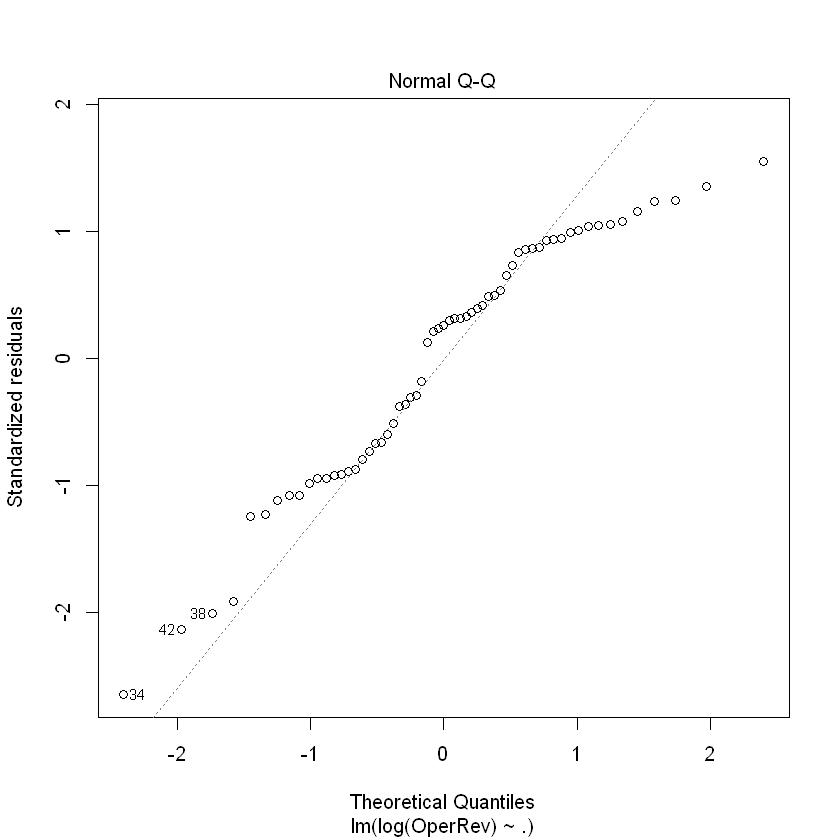

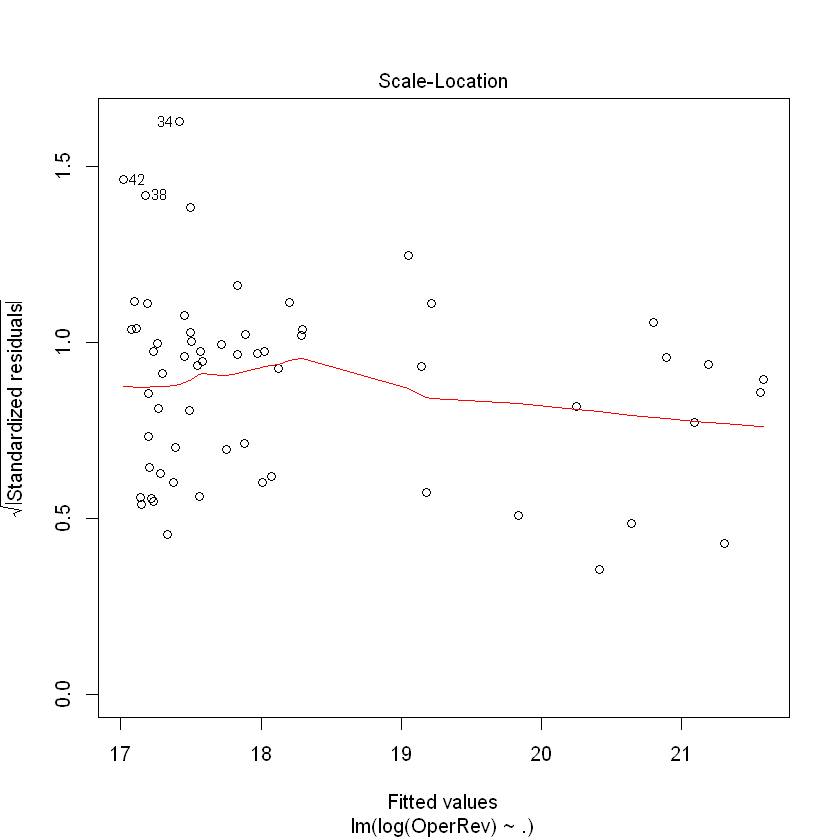

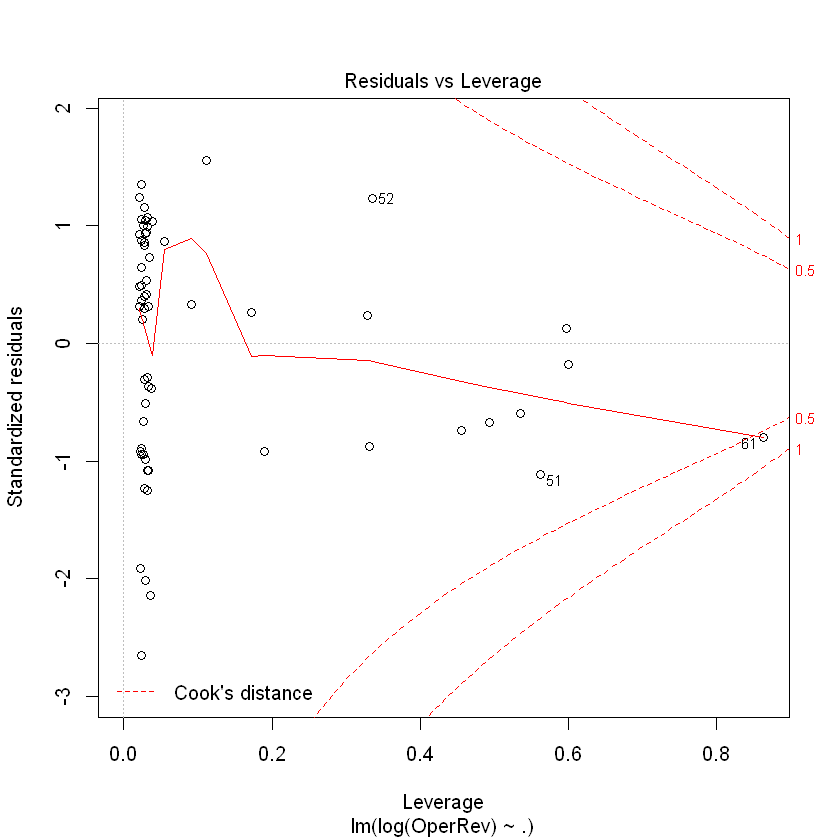

In [98]:
plot(dfnew1.fit)

In [55]:
#Logistic Regression 

In [130]:
df_lg <- df

In [131]:
names(df_lg)

[1] "HospitalID"  "Name"        "Zip"         "Website"     "TypeControl"
 [6] "Teaching"    "DonorType"   "NoFTE"       "NetPatRev"   "InOperExp"  
[11] "OutOperExp"  "OperRev"     "OperInc"     "AvlBeds"

In [128]:
df_lg <- sapply(df, as.numeric)
df_lg

HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
45740,26,28,28,2,1,2,327.00,135520.22,20523426,34916220,49933713,-5505933,15
12145,61,16,60,4,1,2,345.00,136156.69,33447543,20348596,53351748,-444391,99
25667,36,9,39,2,1,2,601.20,197094.25,37254179,37832448,72933707,-2152920,107
46996,38,29,41,4,1,2,400.00,139170.38,23385570,24661356,51087341,3040415,55
37393,3,12,6,3,1,2,262.00,116797.83,13684502,15159987,42845642,14001153,42
17741,47,56,2,4,1,2,397.50,232503.02,36682889,36739260,85808509,12386360,66
20277,60,44,59,4,1,2,503.50,214516.45,32709223,43571851,79005075,2724001,65
45736,32,14,31,2,1,2,158.00,30786.20,5733927,10727445,11947133,-4514239,35
29823,11,51,11,4,1,2,168.00,51726.49,9022366,10402510,19445901,21025,48
13738,49,11,50,4,1,2,1216.00,540975.12,125128283,66801545,199873795,7943967,186


In [129]:

ozone_corr = cor(df_lg)
ozone_corr

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds
HospitalID,1.000000000,-0.2209509162,0.06170773,-0.15080674,-0.16832901,-0.007624498,0.007624498,0.02680361,0.04968444,0.04794797,-0.01044143,0.05176808,0.13802688,0.0183207315
Name,-0.220950916,1.0000000000,0.08101534,0.75750613,0.21288317,0.049840179,-0.049840179,0.15056276,0.13621264,0.08755008,0.15547721,0.11696291,0.05037419,-0.0007787004
Zip,0.061707727,0.0810153358,1.00000000,0.12520673,0.18565393,-0.305271098,0.305271098,-0.28884921,-0.20426033,-0.25001864,-0.14552864,-0.20957028,0.02260832,-0.3438512429
Website,-0.150806740,0.7575061254,0.12520673,1.00000000,0.08832879,-0.103311090,0.103311090,-0.01329261,-0.07478736,-0.07183951,-0.08133554,-0.08891799,-0.08815439,-0.0994575682
TypeControl,-0.168329011,0.2128831711,0.18565393,0.08832879,1.00000000,-0.113675127,0.113675127,0.01942510,0.14546848,0.05036315,0.06778846,0.13971091,0.50075535,-0.0357058367
Teaching,-0.007624498,0.0498401793,-0.30527110,-0.10331109,-0.11367513,1.000000000,-1.000000000,0.80750432,0.77251898,0.80375528,0.74477745,0.76928575,-0.03644294,0.8888132330
DonorType,0.007624498,-0.0498401793,0.30527110,0.10331109,0.11367513,-1.000000000,1.000000000,-0.80750432,-0.77251898,-0.80375528,-0.74477745,-0.76928575,0.03644294,-0.8888132330
NoFTE,0.026803614,0.1505627626,-0.28884921,-0.01329261,0.01942510,0.807504321,-0.807504321,1.00000000,0.90382720,0.93805150,0.88029546,0.89638699,-0.07231425,0.8813330492
NetPatRev,0.049684436,0.1362126391,-0.20426033,-0.07478736,0.14546848,0.772518976,-0.772518976,0.90382720,1.00000000,0.97910894,0.96023198,0.99876505,0.22014898,0.8877272586
InOperExp,0.047947972,0.0875500800,-0.25001864,-0.07183951,0.05036315,0.803755280,-0.803755280,0.93805150,0.97910894,1.00000000,0.93586293,0.97981651,0.07178052,0.9255205449


In [132]:
#### Perform logistic regression using Project as
#### a predictor of Teaching
df_lg.fit = glm(Teaching~DonorType+NoFTE+NetPatRev+InOperExp+OutOperExp+OperRev+AvlBeds, binomial, data=df_lg)
summary(df_lg.fit)


Call:
glm(formula = Teaching ~ DonorType + NoFTE + NetPatRev + InOperExp + 
    OutOperExp + OperRev + AvlBeds, family = binomial, data = df_lg)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06   2.409e-06   2.409e-06  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)
(Intercept)       2.657e+01  2.754e+05       0        1
DonorTypeCharity -5.313e+01  2.369e+05       0        1
NoFTE             6.265e-10  8.072e+01       0        1
NetPatRev        -2.663e-12  1.033e+00       0        1
InOperExp        -5.750e-15  1.289e-03       0        1
OutOperExp       -1.223e-15  1.292e-03       0        1
OperRev           8.194e-15  2.683e-03       0        1
AvlBeds           4.581e-10  7.705e+02       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 7.2189e+01  on 60  degrees of freedom
Residual deviance: 3.5390e-10  on 53  degrees of freedom
AIC: 16

Number of

In [133]:
anova(df_lg.fit, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,60,7.218867e+01,NA
DonorType,1,72.18867,59,3.538965e-10,1.955754e-17
NoFTE,1,0.00000,58,3.538965e-10,1.000000e+00
NetPatRev,1,0.00000,57,3.538965e-10,1.000000e+00
InOperExp,1,0.00000,56,3.538965e-10,1.000000e+00
OutOperExp,1,0.00000,55,3.538965e-10,1.000000e+00
OperRev,1,0.00000,54,3.538965e-10,1.000000e+00
AvlBeds,1,0.00000,53,3.538965e-10,1.000000e+00
